# <center>DRZEWA PRZEDZIAŁOWE</center>

1. Czym są drzewa przedziałowe?

Jest to abstrakcyjna struktura danych, która przechowuje przedziały i pozwala odczytać listę przedziałów zawierających danych punkt.

Przykład. Rozważmy następujące przedziały:
 - $\text{[0,10], [5,20], [7,12], [10,15]}$

Zapiszmy je na osi liczbowej:

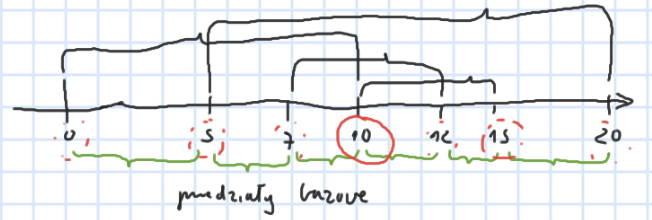

Nasza struktura danych nie będzie się ograniczała tylko do podanych przedziałów, ale do tych, które można otrzymać przez sumę przedziałów bazowych (zaznaczone kolorem $\textcolor{green}{\text{zielonym}}$).

Drzewo, które będziemy konstruować, będzie drzewem $\text{BST}$, opartym na punktach granicznym przedziałów bazowych. Dodatkowow będzie ono statyczne, czyli nie będzie się zmieniać w strukturze, co oznacza, że zbędne jest implementowanie wyważania drzewa ($\text{AVL}$ lub $\text{czerwono-czarne}$)

Konstruując drzewo $\text{BST}$ szukamy punktu środkowego, a jego dziećmi będą punkty środkowe odpowiednio po lewej i prawej stronie. Ostatnie punkty będą miały jeszcze swoje liście.

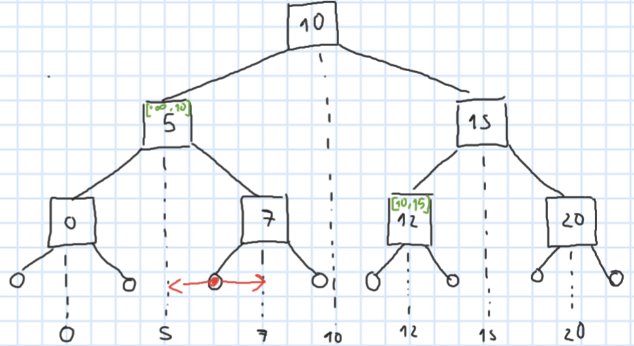

Każdy liść odpowiada za przedział za dany przedział bazowy.
 - liść $\textcolor{red}{\text{czerwony}}$ odpowiada za przedział $\text{[5,7]}$
 - skrajne liście odpowiadają za przedziały od punktów granicznych do nieskończoności

Każdy węzeł odpowiada za sumę przedziałów bazowych w jego poddrzewach.
 - atrybut $\text{span}(x)$ odpowiada za sumę przedziałów bazowych w poddrzewach węzła $x$
 - $\text{span}(10) = [-\infty,\infty]$
 - $\text{span}(5) = [5,10]$
 - $\text{span}(15) = [10,\infty]$

Atrybut $\text{span}$ dla liści jest po prostu przedziałem bazowym.

Przedział przechowujemy w tych węzłach, których $\text{span}$ całkowicie zawiera się w tym przedziale (a nie jest to prawda dla rodzica węzła). W danym węźle możemy przechowywać więcej niż jeden przedział.

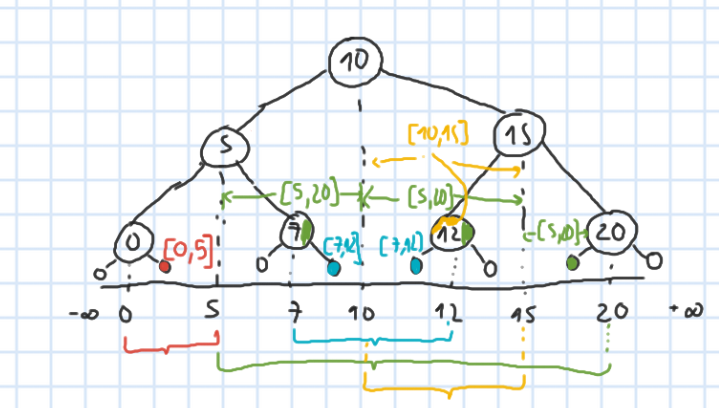

Weźmy następujące przykłady przedziałów:
 - $[0,5]$ - zaznaczony na $\textcolor{red}{\text{czerwono}}$, jest przechowywany tylko przez prawy liść węzła $0$, bo tylko $\text{span}$ tego liścia zawiera się całkowicie w przedziale $[0,5]$
 - $[10,15]$ - zaznaczony na $\textcolor{yellow}{\text{żółto}}$, jest przechowywany przez węzeł $12$, bo $\text{span}$ tego węzła zawiera się całkowicie w przedziale $[10,15]$
 - $[5,20]$ - zaznaczony na $\textcolor{green}{\text{zielono}}$, jest przechowywany przez węzły:
    - $7$, bo $\text{span}(7) = [5,10] \in [5,20]$
    - $12$, bo $\text{span}(12) = [10,15] \in [5,20]$
    - prawy liść $20$, bo $\text{span} $ tego liścia $ = [15,20] \in [5,20]$

Złożoność pamięciowa:
 - każdy przedział na danym poziomie drzewa występuje najwyżej dwa razy
    - jedyna taka sytuacja następuje wtedy, gdy występują w różnych poddrzewach, w innym razie wzięlibyśmy rodzica jako cały przedział
 - mając $n$ przedziałów daje nam to złożoność pamięciową $O(nlogn)$

Operacja wstawiania przedziału do drzewa:
 - zaczynając od korzenia rozważamy węzły
    - jeśli przedział "pasuje idealnie" (atrybut $\text{span}$ jest mu równy), to wstawiamy go
    - w innym przypadku (o ile przecięcie $\neq \empty$):
      - przecięcie przedziału z atrybutem $\text{span}$ lewego dziecka wstawiamy po lewej stronie
      - przecięcie przedziału z atrybutem $\text{span}$ prawego dziecka wstawiamy po prawej stronie
 - złożoność czasowa $O(logn)$ - nie rozważamy wszystkich opcji, bo w trakcie tworzenia ścieżek do węzłów, odrzucamy liczne niepoprawne (przez puste przecięcia) opcje

Obliczanie przedziałów, do których należy dany punkt:
 - znajdujemy przedział bazowy, do którego należy dany punkt (tak samo jak w zwykłym drzewie $\text{BST}$, wędrując w lewo lub w prawo w zależności czy punkt graniczny jest większy lub mniejszy od rozważanego punktu)
 - z tego miejsca wędrujemy w górę gromadząc napotkane przedziały
    - szukając punktu $11$ idzemy w dół drogą $10$->$15$->$12$->lewy liść
    - idąc w górę mamy przdziały (zaczynając od przedziału bazowego liścia, w którym skończyliśmy):
       - $[7,12], [5,20], [10,15]$



      

2. Przykład wykorzystania drzewa przedziałowego do innego zadania.

Potrzebujemy struktury danych przechowującej $n$ liczb indeksowanych od $0$ do $n-1$, na której możemy wykonać następujące operacje:
 - $\text{update}(i,x)$ - zamiana $i$-tej liczby na $x$
 - $\text{sum}(i,j)$ - oblicz sumę liczb od $i$-tej do $j$-tej

Weźmy przykładowo ciąg liczb zapisanych w tablicy:
 - $[0,7,5,3,1,8,6,12,3]$

Każdą liczbę będziemy traktować jako liść drzewa przedziałowego, a węzeł będzie przechowywał sumę jego dzieci

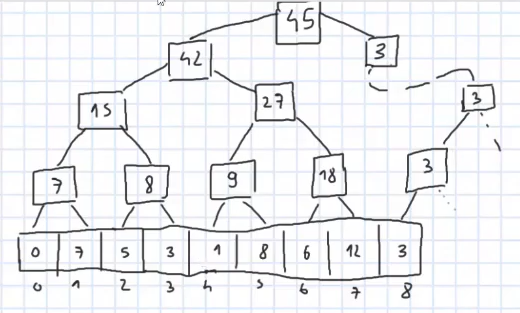

Wygodnym rozwiązaniem implementacyjnym będzie tworzenie drzewa w podobny sposób do tworzenia kopca binarnego w reprezentacji tablicowej.

Operacje:
 - $\text{update}$ - zmieniamy element w tablicy i wędrujemy w górę drzewa akualizująć sumy
 - $\text{sum}$ - analogicznie do wstawiania przedziałów

3. Spadające klocki